In [1]:
#https://seaborn.pydata.org/tutorial/aesthetics.html
#https://seaborn.pydata.org/examples/index.html
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))
%matplotlib inline

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

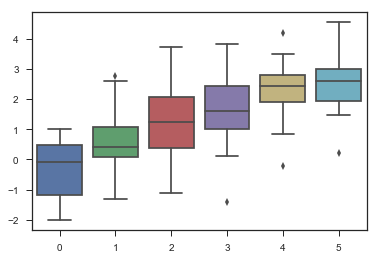

In [5]:
sns.set_style("ticks") # here are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks
# sns.set_style("dark")
# sns.despine()  removes and left lines and also lines in bottom left corner
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

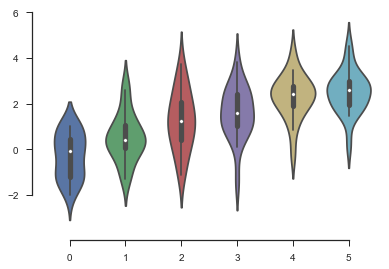

In [7]:
sns.violinplot(data=data)
sns.despine(offset=10, trim=True); # left=true 

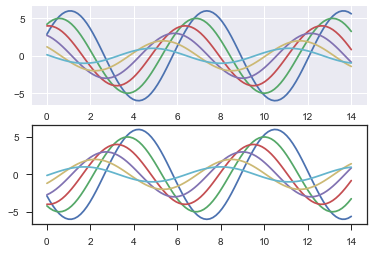

In [8]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

In [ ]:
sns.axes_style()  # this displays all settings

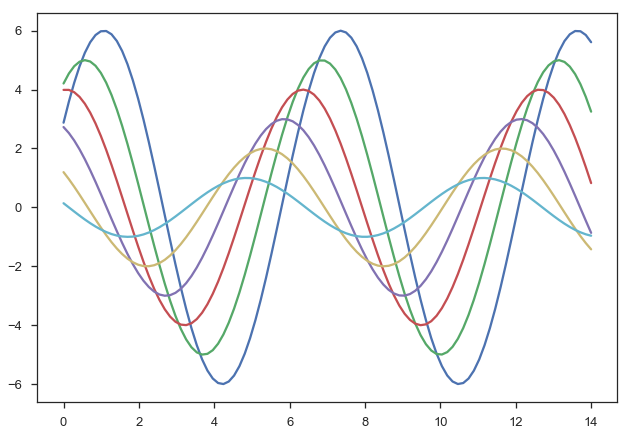

In [9]:
sns.set_context("talk") # paper, notebook, talk, and poster
sinplot()

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)  # here are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind
# https://seaborn.pydata.org/generated/seaborn.hls_palette.html#seaborn.hls_palette
sns.palplot(sns.color_palette("hls", 8))
sns.palplot(sns.hls_palette(8, l=.3, s=.8))
# Customise colour pallette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.palplot(sns.color_palette("Blues"))   # Sequential colour pallettes
sns.palplot(sns.color_palette("cubehelix", 8)) # Cube helis pallettes
sns.palplot(sns.color_palette("BrBG", 7))   # Diverging colour pallettes

# Univariate plotting

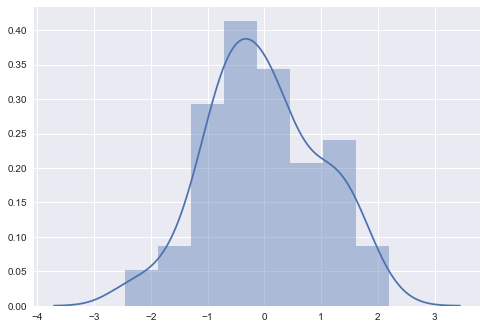

In [11]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "hello")))
x = np.random.normal(size=100)
sns.distplot(x);

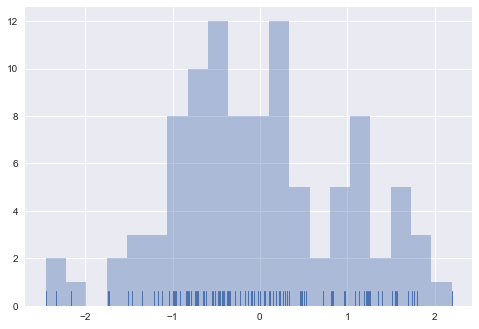

In [14]:
# You can make the rug plot itself with the rugplot() function, but it is also available in distplot():
sns.distplot(x, bins=20, kde=False, rug=True);   # hist=false removes histogram
# sns.kdeplot(x, shade=True);

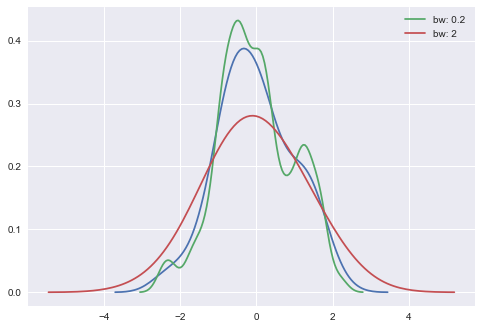

In [16]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=1, label="bw: 2")
plt.legend()

In [ ]:
sns.distplot(x, kde=False, fit=stats.gamma);

# Bivariate

In [ ]:
sns.jointplot(x="x", y="y", data=df);
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");  # hexbin plots
    
sns.jointplot(x="x", y="y", data=df, kind="kde");  # kernel density estimation

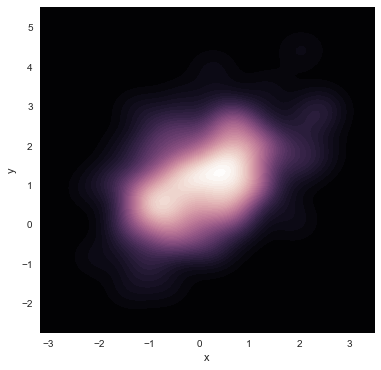

In [19]:
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

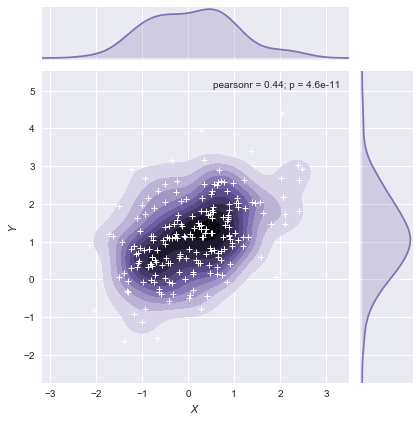

In [20]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

# Pairwise

In [ ]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);
# Use Pair Grid
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

# Categorical
Those show each observation at each level of the categorical variable - use swarmplot and stripplot
Those that show an abstract representation of each distribution of observations - box plot and violinplot
Those that apply a statistical estimation to show a measure of central tendency and confidence interval - barplot() and pointplot().

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);  # time categorical
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

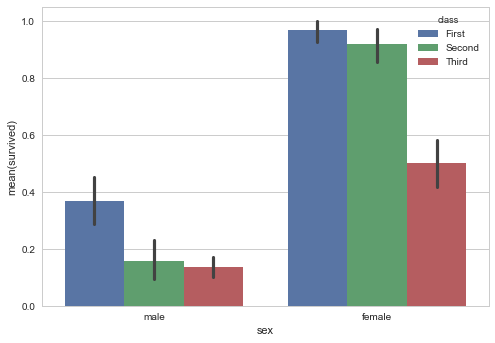

In [3]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);
sns.countplot(x="deck", data=titanic, palette="Greens_d");

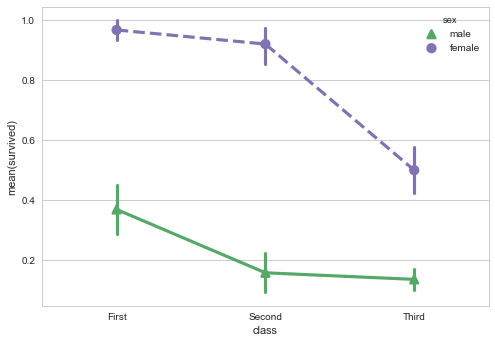

In [5]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

# Multipanel plots

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");  #kind - pointplot by default
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);  # multiple plots 

# Visualising Linear Relationships

In [6]:
tips = sns.load_dataset("tips")

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips);   # plots the regression line with 95% confidence 
sns.lmplot(x="total_bill", y="tip", data=tips);   # ci=None, scatter_kws={"s": 80}  robust=True reduces effect of outliers
                                                    # to fit logistic regression
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});


In contrast, the size and shape of the lmplot() figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

Heatmap and Cluster

In [ ]:
>>> import numpy as np; np.random.seed(0)
>>> import seaborn as sns; sns.set()
>>> uniform_data = np.random.rand(10, 12)
>>> ax = sns.heatmap(uniform_data)   # center = 0 centres on 0

In [ ]:
>>> flights = sns.load_dataset("flights")
>>> flights = flights.pivot("month", "year", "passengers")
>>> ax = sns.heatmap(flights)   # ax = sns.heatmap(flights, annot=True, fmt="d")  linewidths=.5 cmap="YlGnBu" cbar=False

In [ ]:
# Time Series plot
>>> gammas = sns.load_dataset("gammas")
>>> ax = sns.tsplot(time="timepoint", value="BOLD signal",
...                 unit="subject", condition="ROI",
...                 data=gammas)